<a href="https://colab.research.google.com/github/ingwerludwig/machine-learning-bpjs/blob/main/BPJS_Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('max_column',None)

# Import Dataset

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_csv('/content/gdrive/My Drive/BPJS_train.csv',chunksize=10000,iterator=True,low_memory=False)

Mounted at /content/gdrive


In [3]:
test_df = pd.read_csv('/content/gdrive/My Drive/BPJS_test.csv',chunksize=1,iterator=True,low_memory=False)

In [4]:
test_df.get_chunk(1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   1 non-null      int64  
 1   no_peserta                   1 non-null      float64
 2   no_keluarga                  1 non-null      int64  
 3   bobot                        1 non-null      float64
 4   id_kunjungan_fktp            1 non-null      int64  
 5   tgl_dtg_fktp                 1 non-null      object 
 6   tgl_plg_fktp                 1 non-null      object 
 7   provinsi_fktp                1 non-null      int64  
 8   kab/kota_fktp                1 non-null      int64  
 9   kepemilikan_fktp             1 non-null      int64  
 10  jenis_fktp                   1 non-null      int64  
 11  tipe_fktp                    1 non-null      int64  
 12  tingkat_pelayanan_fktp       1 non-null      int64  
 13  jenis_poli_fktp         

In [5]:
df.get_chunk(1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   1 non-null      int64  
 1   no_peserta                   1 non-null      float64
 2   no_keluarga                  1 non-null      int64  
 3   bobot                        1 non-null      float64
 4   id_kunjungan_fktp            1 non-null      int64  
 5   tgl_dtg_fktp                 1 non-null      object 
 6   tgl_plg_fktp                 1 non-null      object 
 7   provinsi_fktp                1 non-null      int64  
 8   kab/kota_fktp                1 non-null      int64  
 9   kepemilikan_fktp             1 non-null      int64  
 10  jenis_fktp                   1 non-null      int64  
 11  tipe_fktp                    1 non-null      int64  
 12  tingkat_pelayanan_fktp       1 non-null      int64  
 13  jenis_poli_fktp         

In [6]:
full_df_list = []
for chunk in df:
    full_df_list.append(chunk)

In [7]:
row_length=0
for frag_df in full_df_list:
  row_length += frag_df.shape[0]

In [8]:
print('Rows length : ' + (str(row_length)))
print('Column length : '+ (str(full_df_list[0].shape[1])))

Rows length : 4056897
Column length : 27


# Column Analysis


Details Column Description
---


1. bobot --> (maybe urgency or not) <br>
2. kepemilikan_fktp --> (related to swasta, pemerintah, etc)<br>
reference [here](https://www.dinkes.jogjaprov.go.id/berita/detail/kebijakan-akreditasi-fasilitas-kesehatan-tingkat-pertama-klinik-pratama)<br>
3. jenis_fktp --> (related to hospital, clinic, etc)<br>
reference [here](https://lifepal.co.id/media/fktp-adalah-fasilitas-kesehatan-tingkat-pertama/)
4. tipe_fktp (?) <br>
5. tingkat_pelayanan_fktp --> (?) <br>
6. segmen_peserta --> (related to Pekerja Penerima Upah (PPU), PD Pemda, Pekerja Bukan Penerima Upah (PBPU) dan Bukan Pekerja (BP), serta Penerima Bantuan Iuran Jaminan Kesehatan (PBI JK)) <br>
reference [here](https://money.kompas.com/read/2022/09/16/093043026/iuran-bpjs-kesehatan-2022-sesuai-jenis-kepesertaan#:~:text=Terdapat%20empat%20jenis%20kepesertaan%20BPJS,Jaminan%20Kesehatan%20(PBI%20JK).)
7. nama_diagnosis_fkp15	--> (doctor diagnosis) <br>
8. kode_diagnosis_ICD10 --> (related to nama_diagnosis nya) <br>
9. kode_diagnosis --> (related to kode_diagnosis_ICD10) <br>
10. kode_nama_ICD10 --> (related to diagnosis) <br>
11. jenis_kunjungan_fktp --> (related to kontrol, rawat jalan, etc)<br>
reference [here](https://blog.assist.id/perbedaan-kunjungan-sakit-dengan-perawatan-saat-mendaftarkan-kunjungan-pasien/)

<br>

Column that may not be required
---
1. id_kunjungan_fktp (maybe not required) <br>
2. no_keluarga (maybe not required) <br>
3. tgl_dtg_fktp (maybe not required) <br>
4. tgl_plg_fktp (maybe not required) <br>
5. kode_nama_ICD10 (maybe not required) because it has been replaced by **kode_diagnosis_ICD10** as well as **kode_nama_ICD10** <br>

# Exploratory Data Analysis

In [9]:
df_peserta_occurences = full_df_list[0][['no_peserta']]
df_peserta_occurences = full_df_list[0].groupby(['no_peserta'])['no_peserta'].count().reset_index(name="banyak_kedatangan")
df_peserta_occurences.sort_values(by=['banyak_kedatangan'],ascending=False)

,no_peserta,banyak_kedatangan
6575,90434274.0,4
7420,102527031.0,3
5175,71323010.0,3
3122,42541361.0,3
3481,47547470.0,3
...,...,...
3309,45143668.0,1
3310,45143738.0,1
3311,45153080.0,1
3312,45154110.0,1


Patient maybe come to medical center more than once as their needs

In [10]:
df_peserta_occurences = full_df_list[0][['jenis_poli_fktp']]
df_peserta_occurences = full_df_list[0].groupby(['jenis_poli_fktp'])['jenis_poli_fktp'].count().reset_index(name="banyak_kedatangan")
df_peserta_occurences.sort_values(by=['banyak_kedatangan'],ascending=False)

,jenis_poli_fktp,banyak_kedatangan
0,1.0,5813
11,13.0,2177
10,12.0,1211
1,2.0,271
2,3.0,270
3,4.0,68
6,7.0,60
19,28.0,47
4,5.0,45
5,6.0,13


Poli type 1 is the most arrival poli

In [11]:
df_sehat = full_df_list[0][(full_df_list[0].kelas_status == 'Sehat')]
df_sehat

,Unnamed: 0,no_peserta,no_keluarga,bobot,id_kunjungan_fktp,tgl_dtg_fktp,tgl_plg_fktp,provinsi_fktp,kab/kota_fktp,kepemilikan_fktp,jenis_fktp,tipe_fktp,tingkat_pelayanan_fktp,jenis_poli_fktp,segmen_peserta,kode_nama_ICD10,kode_diagnosis_ICD10,kode_diagnosis,nama_diagnosis_fkp15,provisin_faskes_rujukan,kab/kota_faskes_rujukan,kepemilikan_faskes_rujukan,jenis_faskes_tujuan_rujukan,tipe_faskes_tujuan_rujukan,poli_faskes_tujuan_rujukan,jenis_kunjungan_fktp,kelas_status
6,6,96816042.0,58294471,11.555749,920145688,2019-07-17,2019-07-17,18,1801,9,3,2,1,12.0,2,9999,NaN,9999,9999,98,9998,98,98,98,98,2,Sehat
7,7,52210982.0,14650656,17.963938,1047912445,2019-11-07,2019-11-07,33,3374,9,2,1,1,12.0,5,9999,NaN,9999,9999,98,9998,98,98,98,98,2,Sehat
8,8,80877043.0,80877043,1.890941,881495888,2019-06-13,2019-06-13,51,5103,9,3,2,1,13.0,2,9999,NaN,9999,9999,98,9998,98,98,98,98,2,Sehat
10,10,52579871.0,73011766,15.022474,852281724,2019-05-04,2019-05-04,63,6309,3,1,4,1,13.0,5,9999,NaN,9999,9999,98,9998,98,98,98,98,2,Sehat
12,12,33986049.0,33986049,27.628746,1187702881,2020-03-17,2020-03-17,73,7317,9,3,2,1,13.0,2,9999,NaN,9999,9999,98,9998,98,98,98,98,2,Sehat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,9986,168934672.0,168934581,649.538147,1394022789,2020-12-10,2020-12-10,31,3175,3,1,3,1,13.0,3,9999,NaN,9999,9999,98,9998,98,98,98,98,2,Sehat
9987,9987,159431050.0,40222957,28.469164,900889804,2019-04-17,2019-04-17,11,1171,4,2,1,1,13.0,5,9999,NaN,9999,9999,98,9998,98,98,98,98,2,Sehat
9990,9990,72505853.0,72505853,237.418121,747888636,2019-01-11,2019-01-11,35,3506,3,1,3,1,13.0,2,9999,NaN,9999,9999,98,9998,98,98,98,98,2,Sehat
9991,9991,87454439.0,87454439,163.986588,894450411,2019-06-24,2019-06-24,32,3201,3,1,4,1,12.0,2,9999,NaN,9999,9999,98,9998,98,98,98,98,2,Sehat


9999 and 9998 are indicate patients have already cured

In [12]:
rows_len=0;
for frag_df in full_df_list:
  rows_len += len(frag_df[(frag_df.nama_diagnosis_fkp15 == '9999') & (frag_df.kelas_status == 'Sehat')])
print('Null data diagnosis classification and has been cured : '+ str(round((rows_len/row_length)*100,2))  + '%')

Null data diagnosis classification and has been cured : 34.02%


# Remove unneccesary column

In [13]:
removed_col = ['no_keluarga','id_kunjungan_fktp','tgl_dtg_fktp','tgl_plg_fktp','kode_diagnosis_ICD10','kode_nama_ICD10','nama_diagnosis_fkp15']
for chunk in full_df_list:
  del chunk[chunk.columns[0]]
  chunk.drop(removed_col,axis=1,inplace=True)

# Check all unique values independent variable for further explanation 

In [14]:
full_df_list[0]

,no_peserta,bobot,provinsi_fktp,kab/kota_fktp,kepemilikan_fktp,jenis_fktp,tipe_fktp,tingkat_pelayanan_fktp,jenis_poli_fktp,segmen_peserta,kode_diagnosis,provisin_faskes_rujukan,kab/kota_faskes_rujukan,kepemilikan_faskes_rujukan,jenis_faskes_tujuan_rujukan,tipe_faskes_tujuan_rujukan,poli_faskes_tujuan_rujukan,jenis_kunjungan_fktp,kelas_status
1,95085112.0,2.626307,51,5171,9,3,2,1,1.0,4,K297,98,9998,98,98,98,98,1,Belum_Sehat
2,224470578.0,1.051830,35,3516,9,2,1,1,3.0,4,Z309,98,9998,98,98,98,98,1,Belum_Sehat
3,63871289.0,364.741455,34,3402,3,1,4,1,1.0,5,I10,98,9998,98,98,98,98,1,Belum_Sehat
4,29915626.0,1.050523,35,3509,3,1,4,1,1.0,1,I110,98,9998,98,98,98,98,1,Belum_Sehat
5,189355720.0,30.044949,62,6206,3,1,4,1,1.0,4,I10,98,9998,98,98,98,98,1,Belum_Sehat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,33425625.0,189.829437,32,3201,3,1,4,1,1.0,3,M069,98,9998,98,98,98,98,1,Belum_Sehat
9997,69400709.0,40.445122,33,3305,9,3,2,1,1.0,5,L30,98,9998,98,98,98,98,1,Belum_Sehat
9998,2157662.0,180.374741,35,3516,9,2,1,1,1.0,5,J069,98,9998,98,98,98,98,1,Belum_Sehat
9999,3808844.0,274.501556,33,3310,3,1,4,1,1.0,2,J069,98,9998,98,98,98,98,1,Belum_Sehat


In [17]:
print(full_df_list[0][['jenis_poli_fktp']].nunique())
print(full_df_list[0][['kode_diagnosis']].nunique())

jenis_poli_fktp    20
dtype: int64
kode_diagnosis    997
dtype: int64


From 10k of appointment on fktp, there are 997 disease

In [70]:
df_disease_occurences = full_df_list[0][['kode_diagnosis']]
df_disease_occurences = full_df_list[0].groupby(['kode_diagnosis'])['kode_diagnosis'].count().reset_index(name="banyak_pasien")
df_disease_occurences.sort_values(by=['banyak_pasien'],ascending=False)

,kode_diagnosis,banyak_pasien
0,9999,3440
403,J069,460
391,J00,398
331,I10,392
523,K30,277
...,...,...
613,L989,1
612,L981,1
611,L980,1
231,G587,1


From 10k of appointment on fktp, there are 3440 that has been cured. J069 is the most common disease that has been consulted

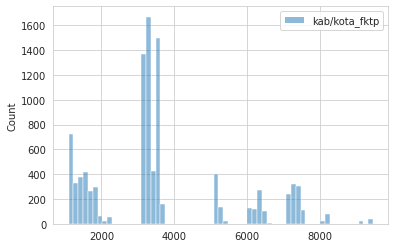

In [18]:
sns.set_style("whitegrid")
sns.histplot(full_df_list[0][['kab/kota_fktp']])
plt.show()